# Library Module

In [1]:
# dependencies - just run this cell

# !pip install habanero
import habanero
from habanero import Crossref
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Python is a programming language applied very frequently in data science. In the first part of this notebook, we will give a brief overview of Python syntax, functions. 


But first, let's go over how to navigate through this Jupyter Notebook. 

## Introduction to Jupyter Notebook

### Create Cells

This notebook contains segments called "cells". To add a cell to the notebook, click the "+" in the top left area right under "File". 

Within a cell, you have the option to write code, create a heading, or write text. To select an option, click on the "Code" button, located on the same row as "+". You will see a menu of options to choose from. 


Markdown - use for text
<br>
Code - use for running code
<br>
Heading - use for titles

### Delete Cells

To delete a cell, click on the cell, and click the **scissors** icon next to the "+"

### Editing and Running Cells

**Running a cell** is equivalent to pressing **Enter** on a calculator once you've typed in the expression you want to evaluate: it produces an **output**. When you run a text cell, it outputs clean, organized writing. When you run a code cell, it **computes** all of the expressions you want to evaluate, and may **output** the result of the computation.

To edit the content a cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle. Next, double-click on it. For example, if you double-click the "Running Cells" heading, you will see **### Running Cells** in bold, blue font. 

To run a cell, either click "Run" in the panel below "File, Edit...", or press Shift + Enter on your laptop. 

### Saving Your Work

To save your work, click on "File", then "Save and Checkpoint". If you have a Mac, you can click **"Command + S"**. 

For this notebook, you only need to know how to run, edit and create cells. However, for more assistance with navigating Jupyter Notebook, click on the **keyboard** icon next to the cell drop-down menu.

For more help, here's a great cheat sheet: https://i.pinimg.com/originals/f5/7e/07/f57e074be4503a39f6d9d8d15f0e8aa5.png

# Introduction to Python

### Variables

A name that is used to denote something or a value is called a variable. In python, variables can be declared and values can be assigned to them. Values can include numbers and strings. Run the code below:

In [ ]:
x = 5
y = 2
hi = "Hello World"

Because the above cell ran, we've now officially assigned the variables to values. Run the cell (Shift + Enter) below to see the output of "x", "hi", and "print (x+y)"

In [ ]:
x

In [ ]:
hi

In [ ]:
print (x + y)

## Introduction to Visualization

### Matplotlib

In [ ]:
import matplotlib

# Intro to CrossRef

CrossRef is a non-profit organization that helps to provides access to scientific literature. According to their [website itself](https://www.crossref.org/), CrossRef "makes research outputs easy to find, cite, link, and assess". 

CrossRef data on scientific publications essentially consists of three elements:
<br>
    1) Metadata about a publication
    <br>
    2) A URL link to the article
    <br>
    3) A document identifier (doi)
    <br>
    
At present CrossRef contains information on 80 million scientific publications including articles, books and book chapters.

Data can be accessed using the python packages habanero, crossrefapi, and crossref-commons. In this module, we'll be focusing on the functionality of the **habanero** package. 

### Import CrossRef Package

When importing a package into Jupyter Notebook, we use the command "pip install ..." to download a package into Jupyter Notebook. 

We then use the command "import __(package name)__" to use our new package in our code. 

In [ ]:
!pip install habanero

In [ ]:
#To use CrossRef API in Python, we need to import the habanero package
import habanero
import pandas as pd
from habanero import Crossref

To create an object that takes on the Crossref identity, we assign it to the variable 'cr'.

In [2]:
cr = Crossref()      

The main function we will use is called `cr.works()`. This function takes in a query name.

In [3]:
kenya = cr.works(query = "kenya")

If we inpspect `kenya`, we can see that it is a dictionary. The keys of the dictionary are displayed below as well.

In [4]:
type(kenya)

dict

In [5]:
list(kenya.keys())

['status', 'message-type', 'message-version', 'message']

Let's see what the values are for each of the keys in the `kenya` dictionary.

In [6]:
kenya['status']

'ok'

In [7]:
kenya['message-type']

'work-list'

In [8]:
kenya['message-version']

'1.0.0'

In [ ]:
kenya['message']

It seems like the `message` contains most of the information we're interested in. Below, take a look at the keys of the message component of the `kenya` dictionary.

In [10]:
list(kenya['message'].keys())

['facets', 'total-results', 'items', 'items-per-page', 'query']

In [11]:
kenya['message']['facets']

{}

In [12]:
# This tells us that the total number of results referencing Kenya correspond with a web based query.
kenya['message']['total-results']

41617

In [13]:
kenya['message']['items-per-page']

20

In [14]:
kenya['message']['query']

{'start-index': 0, 'search-terms': 'kenya'}

In [ ]:
kenya['message']['items']

Let's create a dataframe of the information so that we can access it more easily. We'll also look at the columns that our dataframe contains.

In [16]:
df_kenya = pd.DataFrame(kenya['message']['items'])
df_kenya.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'content-domain',
       'short-container-title', 'DOI', 'type', 'created', 'page', 'source',
       'is-referenced-by-count', 'title', 'prefix', 'volume', 'author',
       'member', 'published-online', 'container-title', 'language',
       'deposited', 'score', 'issued', 'references-count', 'journal-issue',
       'alternative-id', 'URL', 'ISSN', 'issn-type', 'publisher-location',
       'published-print', 'isbn-type', 'link', 'editor', 'ISBN',
       'original-title', 'subject', 'abstract', 'license', 'update-policy',
       'subtitle', 'assertion', 'institution'],
      dtype='object')

We want to be able to retrieve more data from CrossRef. A single CrossRef query can return up to 1,000 results, and since our query has 41,616 total results, we'd need to make 42 queries. The CrossRef API permits fetching results from multiple pages, so by setting `cursor` to * and `cursor_max` to 5000 we can grab 5000 queries at once. Querying all 42,000 results would take a long time, so for the purposes of this demonstration we are only using 5000.

In [17]:
cr_kenya = cr.works(query="kenya", cursor = "*", cursor_max = 5000, progress_bar = True)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [03:16<00:00,  1.27it/s]


We can check that we have the 5,000 messages, and indeed we do.

In [18]:
sum([len(k['message']['items']) for k in cr_kenya])

5000

In [20]:
items = [k['message']['items'] for k in cr_kenya]
items = [item for sublist in items for item in sublist]

# Visualization
Let's visualize our data. We'll start by looking at the publishers. First, we need to do some wrangling to get the data in a form that's useful for us.

In [21]:
publishers = np.array([k['publisher'] for k in items])

In [22]:
unique_elements, counts_elements = np.unique(publishers, return_counts=True)
publish = pd.DataFrame({'publisher': unique_elements, 'count': counts_elements}).sort_values(by='count', ascending=False)

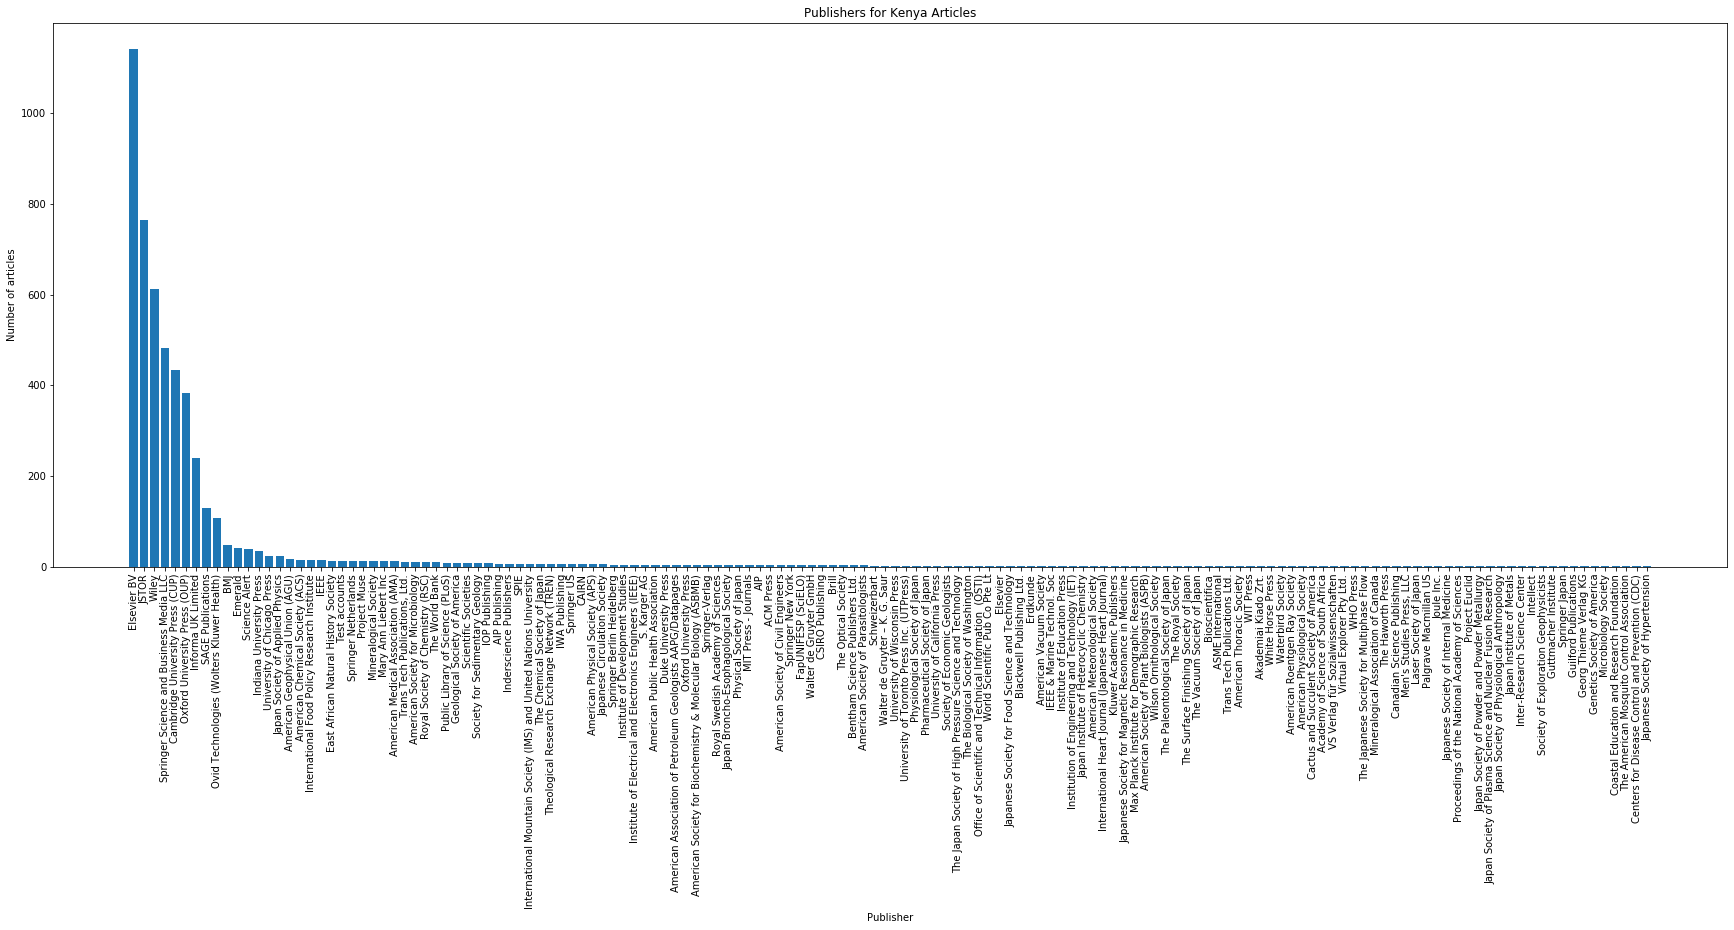

In [23]:
plt.figure(figsize=(30,10)) 
plt.bar(publish['publisher'], publish['count'])
plt.xticks(publish['publisher'], rotation='vertical')
plt.title('Publishers for Kenya Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of articles');

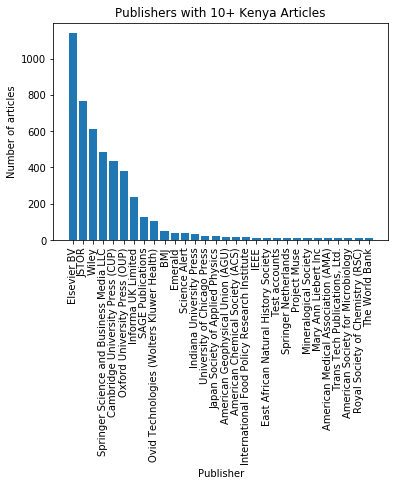

In [24]:
more_than_10 = publish[publish['count'] >= 10]
# plt.figure(figsize=(30,10)) 
plt.bar(more_than_10['publisher'], more_than_10['count'])
plt.xticks(more_than_10['publisher'], rotation='vertical')
plt.title('Publishers with 10+ Kenya Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of articles');

There are different types of articles that can be published. Let's look at the different types and their counts.

In [25]:
#Count types
types = np.array([k['type'] for k in items])
unique_elements_type, counts_elements_type = np.unique(types, return_counts=True)
type_df = pd.DataFrame({'type': unique_elements_type, 'count': counts_elements_type}).sort_values(by='count', ascending=False)
type_df

,type,count
3,journal-article,4886
1,book-chapter,56
5,proceedings-article,33
0,book,10
2,dissertation,7
6,reference-book,4
7,report,3
4,monograph,1


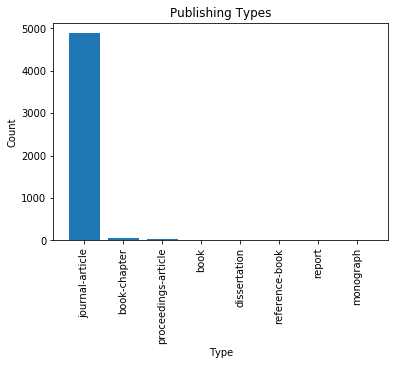

In [26]:
# plt.figure(figsize=(30,10)) 
plt.bar(type_df['type'], type_df['count'])
plt.xticks(type_df['type'], rotation='vertical')
plt.title('Publishing Types')
plt.xlabel('Type')
plt.ylabel('Count');

It looks like journal articles are the main items published, and the amount of books, reference books, and monographs pales in comparison.

Below, we will also visualize the number of references in each article and the number of articles published by year.

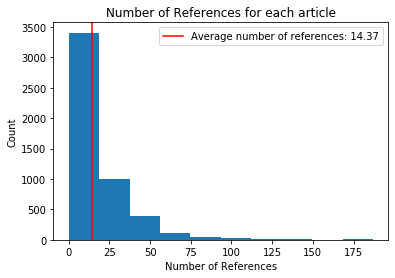

In [27]:
reference_counts = [items[i]['reference-count'] for i in range(len(items))]
plt.hist(reference_counts)
plt.axvline(np.mean(reference_counts), color = 'red', 
            label = 'Average number of references: ' + str(np.round(np.mean(reference_counts), 2)))

plt.title('Number of References for each article')
plt.xlabel('Number of References')
plt.ylabel('Count')
plt.legend();

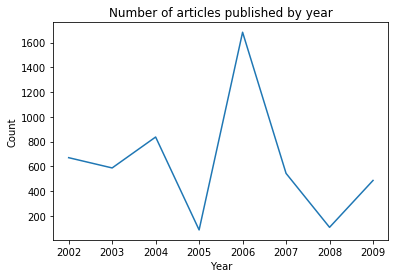

In [30]:
years = [items[i]['created']['date-parts'][0][0] for i in range(len(items))]
d = dict(Counter(years))
plt.plot(list(d.keys()),list(d.values()))
plt.xticks(np.arange(2002, 2010))
plt.title('Number of articles published by year')
plt.xlabel('Year')
plt.ylabel('Count');